# Observatório Imobiliário de Araraquara
## Análise Exploratória de Dados

Este notebook demonstra como explorar os dados coletados do mercado imobiliário de Araraquara.

In [2]:
# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)

%matplotlib inline

## 1. Carregar Dados

In [3]:
# Carregar arquivo (ajuste o índice conforme necessário)
df = pd.read_csv('arquivo_viva_real_limpo.csv')

## 2. Exploração Inicial

In [4]:
# Informações gerais
print("Informações do dataset:")
df.info()

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   preco        1001 non-null   float64
 1   area_m2      1001 non-null   int64  
 2   quartos      1001 non-null   float64
 3   banheiros    1001 non-null   float64
 4   vagas        1001 non-null   float64
 5   localizacao  1001 non-null   object 
 6   imovel       1001 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 54.9+ KB


In [5]:
# Estatísticas descritivas
df.describe().round(3)

,preco,area_m2,quartos,banheiros,vagas
count,1001.000,1001.000,1001.000,1001.000,1001.000
mean,305112.327,93.667,2.213,1.417,1.532
std,180502.281,70.047,0.585,0.801,1.110
min,70000.000,12.000,1.000,1.000,1.000
25%,165000.000,46.000,2.000,1.000,1.000
50%,260000.000,55.000,2.000,1.000,1.000
75%,395000.000,139.000,2.000,2.000,2.000
max,1370000.000,539.000,5.000,6.000,13.000


In [6]:
# Valores ausentes
print("Valores ausentes por coluna:")
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Valores ausentes por coluna:


Series([], dtype: int64)

## 3. Análise de Preços

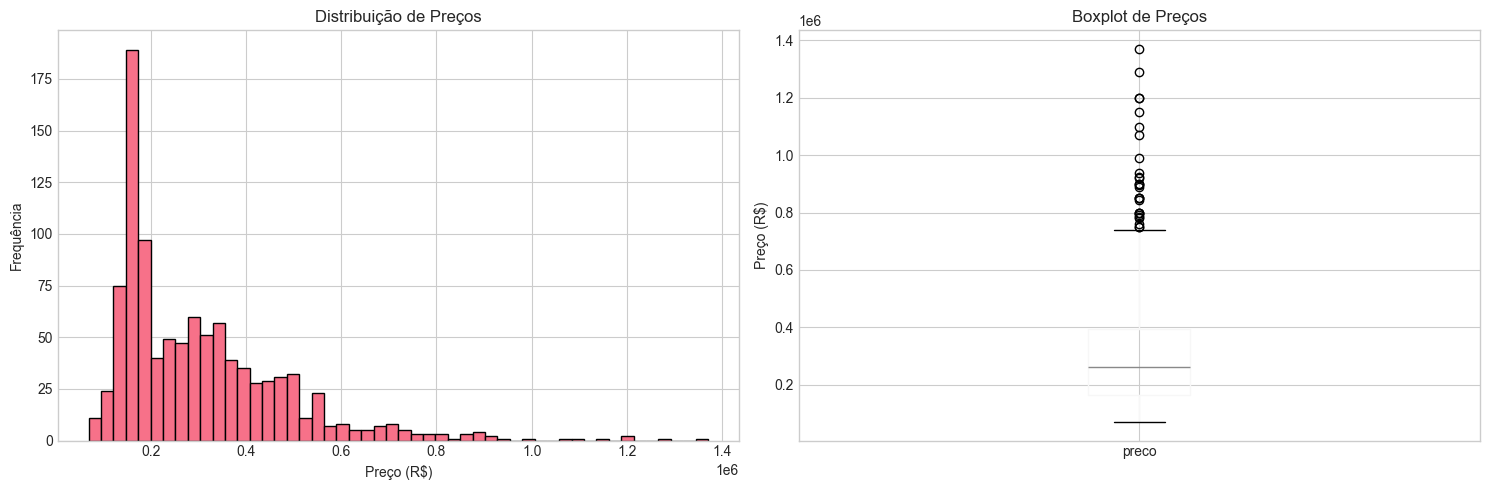

In [7]:
# Distribuição de preços
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma
df['preco'].hist(bins=50, ax=axes[0], edgecolor='black')
axes[0].set_xlabel('Preço (R$)')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição de Preços')

# Boxplot
df.boxplot(column='preco', ax=axes[1])
axes[1].set_ylabel('Preço (R$)')
axes[1].set_title('Boxplot de Preços')

plt.tight_layout()
plt.show()

In [8]:
# Estatísticas de preço
print("Estatísticas de Preço:")
print(f"Média: R$ {df['preco'].mean():,.2f}")
print(f"Mediana: R$ {df['preco'].median():,.2f}")
print(f"Mínimo: R$ {df['preco'].min():,.2f}")
print(f"Máximo: R$ {df['preco'].max():,.2f}")
print(f"Amplitude: {df['preco'].max() / df['preco'].min():.2f}x")

Estatísticas de Preço:
Média: R$ 305,112.33
Mediana: R$ 260,000.00
Mínimo: R$ 70,000.00
Máximo: R$ 1,370,000.00
Amplitude: 19.57x


In [9]:
df[df['preco'] > 1000000]

,preco,area_m2,quartos,banheiros,vagas,localizacao,imovel
508,1100000.0,448,4.0,5.0,3.0,"Centro, Araraquara",Conjunto
577,1199210.0,163,3.0,4.0,4.0,"Parque Residencial Damha, Araraquara",condomínio
833,1070000.0,180,3.0,1.0,1.0,"Quinta do Salto Residence, Araraquara",condomínio
837,1200000.0,243,4.0,4.0,4.0,"Vila Harmonia, Araraquara",Casa
900,1370000.0,158,3.0,3.0,2.0,"Parque Residencial Damha, Araraquara",condomínio
927,1290000.0,179,3.0,3.0,4.0,"Parque Residencial Damha, Araraquara",condomínio
979,1150000.0,145,3.0,4.0,3.0,"Centro, Araraquara",Apartamento


## 4. Análise por Tipo de Imóvel

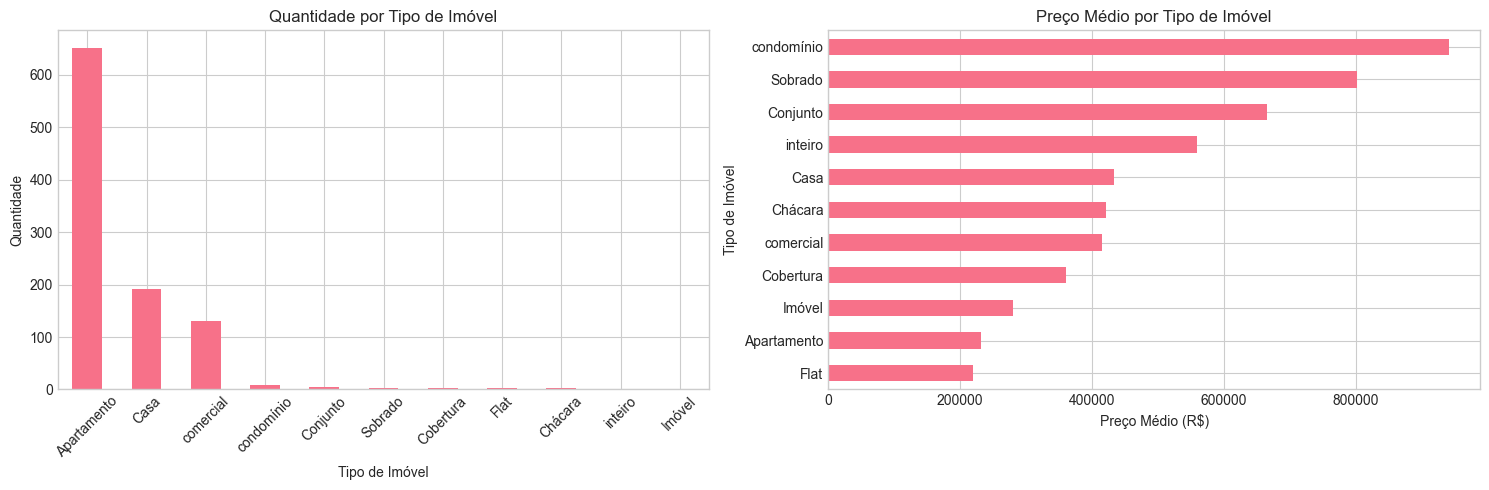

In [10]:
# Distribuição por tipo
if 'imovel' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Contagem
    tipo_counts = df['imovel'].value_counts()
    tipo_counts.plot(kind='bar', ax=axes[0])
    axes[0].set_xlabel('Tipo de Imóvel')
    axes[0].set_ylabel('Quantidade')
    axes[0].set_title('Quantidade por Tipo de Imóvel')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Preço médio
    preco_por_tipo = df.groupby('imovel')['preco'].mean().sort_values()
    preco_por_tipo.plot(kind='barh', ax=axes[1])
    axes[1].set_xlabel('Preço Médio (R$)')
    axes[1].set_ylabel('Tipo de Imóvel')
    axes[1].set_title('Preço Médio por Tipo de Imóvel')
    
    plt.tight_layout()
    plt.show()

## 5. Análise por Bairro

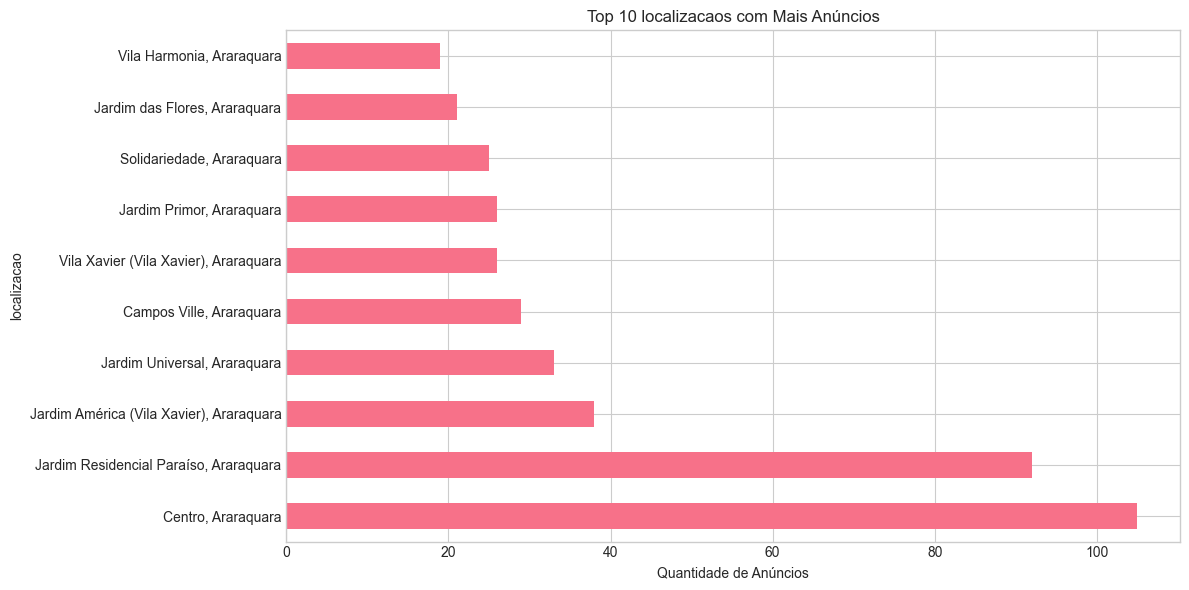

In [11]:
# Top 10 localizacaos
if 'localizacao' in df.columns:
    top_localizacaos = df['localizacao'].value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    top_localizacaos.plot(kind='barh')
    plt.xlabel('Quantidade de Anúncios')
    plt.ylabel('localizacao')
    plt.title('Top 10 localizacaos com Mais Anúncios')
    plt.tight_layout()
    plt.show()

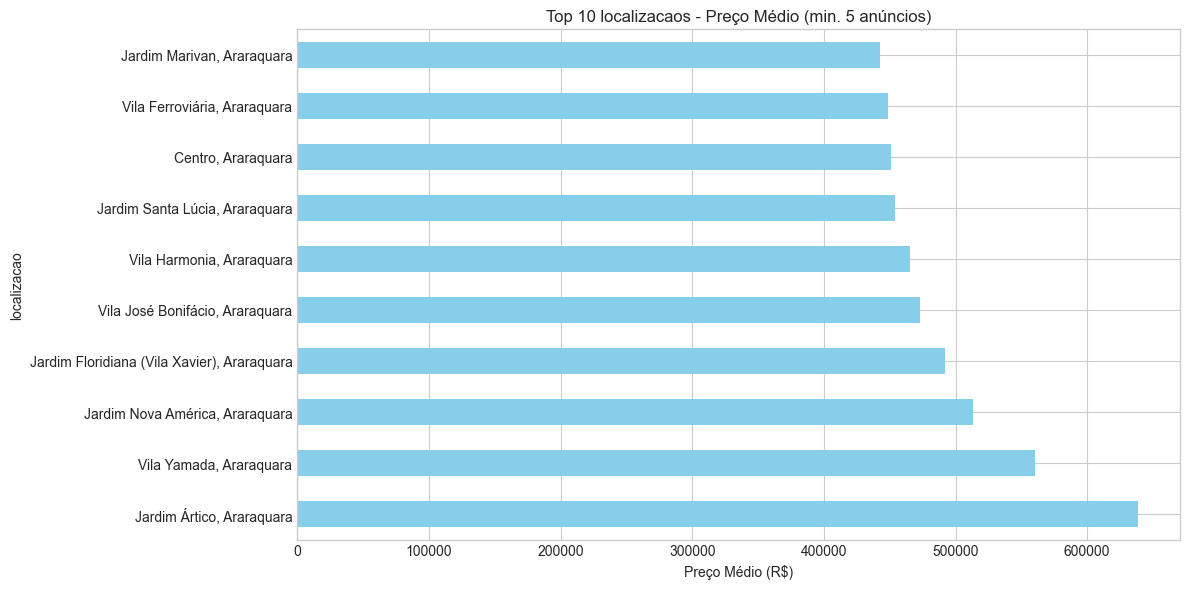

In [12]:
# Preço médio por localizacao (top 10)
if 'localizacao' in df.columns:
    # Filtrar apenas localizacaos com pelo menos 5 anúncios
    localizacaos_relevantes = df['localizacao'].value_counts()[df['localizacao'].value_counts() >= 5].index
    df_filtrado = df[df['localizacao'].isin(localizacaos_relevantes)]
    
    preco_localizacao = df_filtrado.groupby('localizacao')['preco'].mean().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(12, 6))
    preco_localizacao.plot(kind='barh', color='skyblue')
    plt.xlabel('Preço Médio (R$)')
    plt.ylabel('localizacao')
    plt.title('Top 10 localizacaos - Preço Médio (min. 5 anúncios)')
    plt.tight_layout()
    plt.show()

## 6. Análise de Amplitude (Desigualdade)

In [13]:
# Calcular amplitude por localizacao
if 'localizacao' in df.columns:
    amplitude_localizacao = df.groupby('localizacao')['preco'].agg(['min', 'max', 'count'])
    amplitude_localizacao['amplitude'] = amplitude_localizacao['max'] / amplitude_localizacao['min']
    
    # Filtrar localizacaos com pelo menos 10 anúncios
    amplitude_localizacao = amplitude_localizacao[amplitude_localizacao['count'] >= 10]
    amplitude_localizacao = amplitude_localizacao.sort_values('amplitude', ascending=False).head(10)
    
    print("Top 10 localizacaos - Maior Amplitude de Preços:")
    print(amplitude_localizacao[['min', 'max', 'amplitude']])

Top 10 localizacaos - Maior Amplitude de Preços:
                                               min        max  amplitude
localizacao                                                             
Vila Harmonia, Araraquara                 130000.0  1200000.0   9.230769
Centro, Araraquara                        135000.0  1150000.0   8.518519
Campos Ville, Araraquara                   87819.0   680000.0   7.743199
Vila Xavier (Vila Xavier), Araraquara     100000.0   610000.0   6.100000
Jardim Primor, Araraquara                 135000.0   760000.0   5.629630
Parque Laranjeiras, Araraquara             88404.0   495000.0   5.599294
Jardim Residencial Paraíso, Araraquara     80000.0   380000.0   4.750000
Parque Residencial Iguatemi, Araraquara    72988.0   300000.0   4.110265
Jardim das Flores, Araraquara             130000.0   520000.0   4.000000
Jardim América (Vila Xavier), Araraquara   89575.0   320000.0   3.572425


## 7. Correlações

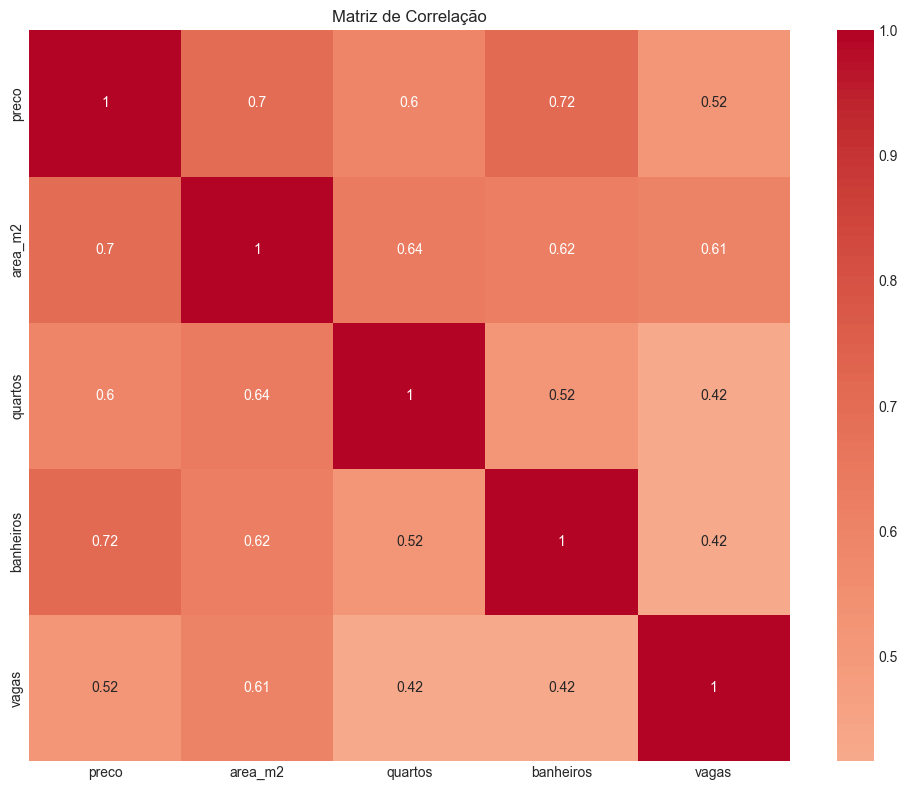

In [14]:
# Selecionar colunas numéricas
colunas_numericas = ['preco', 'area_m2', 'quartos', 'banheiros', 'vagas']
colunas_disponiveis = [col for col in colunas_numericas if col in df.columns]

if len(colunas_disponiveis) > 1:
    # Matriz de correlação
    correlacao = df[colunas_disponiveis].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlacao, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlação')
    plt.tight_layout()
    plt.show()

## 8. Salvar Análises

In [15]:
# Criar resumo e salvar
resumo = {
    'total_imoveis': len(df),
    'preco_medio': df['preco'].mean(),
    'preco_mediano': df['preco'].median(),
    'amplitude_preco': df['preco'].max() / df['preco'].min()
}

print("Resumo da Análise:")
for chave, valor in resumo.items():
    print(f"{chave}: {valor}")

Resumo da Análise:
total_imoveis: 1001
preco_medio: 305112.32667332666
preco_mediano: 260000.0
amplitude_preco: 19.571428571428573


## 9. Classificando Bairros


In [23]:
df['localizacao'] = df['localizacao'].str.split(',').str[0]
df['localizacao'].unique()

array(['Campos Ville', 'Parque Laranjeiras',
       'Vila Cidade Industrial (Vila Xavier)',
       'Jardim América (Vila Xavier)', 'Vila Xavier (Vila Xavier)',
       'Cidade Jardim', 'Centro', 'Jardim Pinheiros (Vila Xavier)',
       'Jardim Brasil (Vila Xavier)', 'Jardim Residencial Paraíso',
       'Jardim São Francisco', 'Parque Residencial Iguatemi',
       'Jardim Imperador', 'Jardim dos Manacás', 'Jardim Bandeirantes',
       'Jardim das Flores', 'Jardim Higienópolis',
       'Jardim Residencial Elvio Lupo', 'Vila Ferroviária',
       'Vila Suconasa', 'Vila Furlan', 'Jardim Ártico',
       'Jardim Universal', 'Jardim Roberto Selmi Dei',
       'Vila Esperança (Vila Xavier)', 'Jardim Imperador II',
       'Jardim São Rafael I', 'Jardim Almeida', 'Altos do Jaraguá',
       'Residencial Cambuy', 'Jardim do Carmo', 'Jardim do Bosque',
       'Jardim Quitandinha', 'Jardim Cruzeiro do Sul I e II',
       'Jardim dos Ipês', 'Jardim Adalberto Frederico de Oliveira Roxo I',
       'Jardi

In [24]:
bairros_chiques = ['Jardim das Estações (Vila Xavier)', 'Jardim América (Vila Xavier)', 'Jardim Botânico', 'Jardim Morumbi', 'Campos Ville', 'Parque Residencial Damha']

In [26]:
df['localizacao'] = df['localizacao'].str.strip()
df['bairro_chique'] = df['localizacao'].apply(lambda x: '1' if x in bairros_chiques else '0')

In [27]:
df.head()

,preco,area_m2,quartos,banheiros,vagas,localizacao,imovel,bairro_chique
0,155000.0,50,2.0,1.0,1.0,Campos Ville,Apartamento,1
1,88404.0,45,2.0,1.0,1.0,Parque Laranjeiras,Apartamento,0
2,81964.0,46,2.0,1.0,1.0,Vila Cidade Industrial (Vila Xavier),Apartamento,0
3,89575.0,44,2.0,1.0,1.0,Jardim América (Vila Xavier),Apartamento,1
4,125000.0,44,2.0,1.0,1.0,Vila Xavier (Vila Xavier),Apartamento,0
